In [30]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs

!pip install folium
import folium # map rendering library
from bs4 import BeautifulSoup
import lxml
print('Libraries imported.')
!pip install wikipedia
import wikipedia as wp

Libraries imported.


Select Taipei City Code

In [4]:
# Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain 
#the data that is in the table of postal codes and to transform the data into a pandas dataframe
# enter the h1 element in wp.page(h1)
html = wp.page("Postal_codes_in_Taiwan").html().encode("UTF-16")

# determine the index of your table
df = pd.read_html(html, header = 0)[1]
df.drop(df.index[0], inplace=True)
df
df.rename(columns={ df.columns[1]: "Districts" }, inplace = True)
df   


,Code,Districts,Chinese
1,100,Zhongzheng District,中正區
2,103,Datong District,大同區
3,104,Zhongshan District,中山區
4,105,Songshan District,松山區
5,106,Daan District,大安區
6,108,Wanhua District,萬華區
7,110,Xinyi District,信義區
8,111,Shilin District,士林區
9,112,Beitou District,北投區
10,114,Neihu District,內湖區


Select New Taipei Code 

In [5]:
# Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain 
#the data that is in the table of postal codes and to transform the data into a pandas dataframe
# enter the h1 element in wp.page(h1)
html = wp.page("Postal_codes_in_Taiwan").html().encode("UTF-16")

# determine the index of your table
df2 = pd.read_html(html, header = 0)[2]
df2.rename(columns={ df2.columns[1]: "Districts" }, inplace = True)
df2.drop(df.index[0], inplace=True)
df2
df2[13:42]              


,Code,Districts,Chinese
14,207,Wanli District,萬里區
15,208,Jinshan District,金山區
16,220,Banqiao District,板橋區
17,221,Xizhi District,汐止區
18,222,Shenkeng District,深坑區
19,223,Shiding District,石碇區
20,224,Ruifang District,瑞芳區
21,226,Pingxi District,平溪區
22,227,Shuangxi District,雙溪區
23,228,Gongliao District,貢寮區


Select just Banqiao,Xindian,Zonghe,Yonghe,Tamsui,Sanchong

In [6]:
df3=df2.iloc[['15', '23','26','27','32','39']]
df3

,Code,Districts,Chinese
16,220,Banqiao District,板橋區
24,231,Xindian District,新店區
27,234,Yonghe District,永和區
28,235,Zhonghe District,中和區
33,241,Sanchong District,三重區
40,251,Tamsui District,淡水區


Add coordinates for New Taipei Districts

In [7]:
Latitude = [25.01141,24.97506,25.0094921,25.002018,25.0626492,25.172847]
Longitude = [121.461842,121.5406964,121.5198286,121.4798588,121.4858982,121.4439717]

df3.insert(3, "Latitude", Latitude, False) 
df3.insert(4, "Longitude", Longitude, False) 
df3

,Code,Districts,Chinese,Latitude,Longitude
16,220,Banqiao District,板橋區,25.011410,121.461842
24,231,Xindian District,新店區,24.975060,121.540696
27,234,Yonghe District,永和區,25.009492,121.519829
28,235,Zhonghe District,中和區,25.002018,121.479859
33,241,Sanchong District,三重區,25.062649,121.485898
40,251,Tamsui District,淡水區,25.172847,121.443972


Add coordinates for Taipei city Districts

In [8]:
Latitude = [25.031667, 25.04776,25.068889,25.0493,25.0297299,25.026285,25.034833194,25.0833,25.1319006,25.0666664,25.053315,24.997021]
Longitude = [121.516389,121.53185,121.533056,121.5780,121.5361368,121.497032,121.567664396,121.517,121.4985967,121.583331,121.607409,121.5427618]

df.insert(3, "Latitude", Latitude, False) 
df.insert(4, "Longitude", Longitude, False) 
df

,Code,Districts,Chinese,Latitude,Longitude
1,100,Zhongzheng District,中正區,25.031667,121.516389
2,103,Datong District,大同區,25.047760,121.531850
3,104,Zhongshan District,中山區,25.068889,121.533056
4,105,Songshan District,松山區,25.049300,121.578000
5,106,Daan District,大安區,25.029730,121.536137
6,108,Wanhua District,萬華區,25.026285,121.497032
7,110,Xinyi District,信義區,25.034833,121.567664
8,111,Shilin District,士林區,25.083300,121.517000
9,112,Beitou District,北投區,25.131901,121.498597
10,114,Neihu District,內湖區,25.066666,121.583331


Merge New Taipei and Taipei City

In [9]:
df_final=df.append(df3, ignore_index=True)
df_final.ftypes

Code          object:dense
Districts     object:dense
Chinese       object:dense
Latitude     float64:dense
Longitude    float64:dense
dtype: object

add Geographical information


In [10]:
address = 'Taipei,Taiwan'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Taipei,Taiwan are {}, {}.'.format(latitude, longitude))

# create map of Toronto using latitude and longitude values
map_taipei = folium.Map(location=[latitude, longitude],tiles='Stamen Terrain', zoom_start=12)

     # add markers to map
for lat, lng, Districts in zip(df_final['Latitude'], df_final['Longitude'], df_final['Districts']):
    label = '{}'.format(Districts)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='lightgreen',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_taipei)  
map_taipei

The geograpical coordinate of Taipei,Taiwan are 25.0375198, 121.5636796.


Explore and cluster the neighborhoods


In [11]:
CLIENT_ID = 'R4WINZIX50TNKXEEQJTMDISXQ3UUF5ONEVUHBLILTMMDBIX3' # your Foursquare ID
CLIENT_SECRET = 'OL4CKT5NSVBFHKWFHKGXYS11PE35HS34HO0JDRBQDRFIT5SM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
LIMIT = 300

Your credentails:
CLIENT_ID: R4WINZIX50TNKXEEQJTMDISXQ3UUF5ONEVUHBLILTMMDBIX3
CLIENT_SECRET:OL4CKT5NSVBFHKWFHKGXYS11PE35HS34HO0JDRBQDRFIT5SM


Let's explore 



In [12]:
def getNearbyVenues(names, latitudes, longitudes,radius=2000):
    
    venues_list=[]
    LIMIT=10000
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius,
        LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue ( venue = place in FourSquare)
        venues_list.append([(
            name,             
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Districts',                  
                  'Place', 
                  'Place Latitude', 
                  'Place Longitude', 
                  'Place Category']
    
    return(nearby_venues)


In [172]:
Taipei_venues = getNearbyVenues(names=df_final['Districts'],
                                   latitudes=df_final['Latitude'],
                                   longitudes=df_final['Longitude'])
print(Taipei_venues.shape)
Taipei_venues.head()



Zhongzheng District
Datong District
Zhongshan District
Songshan District
Daan District
Wanhua District
Xinyi District
Shilin District
Beitou District
Neihu District
Nangang District
Wenshan District
Banqiao District
Xindian District
Yonghe District
Zhonghe District
Sanchong District
Tamsui District
(1526, 5)


,Districts,Place,Place Latitude,Place Longitude,Place Category
0,Zhongzheng District,Kinfen Braised Pork Rice (金峰魯肉飯),25.032194,121.518534,Taiwanese Restaurant
1,Zhongzheng District,National Theater (國家戲劇院),25.035197,121.518188,Theater
2,Zhongzheng District,福井麵疙瘩,25.029905,121.515622,Noodle House
3,Zhongzheng District,秘魯烤雞 Polleria,25.029191,121.517120,Latin American Restaurant
4,Zhongzheng District,Ebisu Curry & Coffee,25.030015,121.516384,Japanese Restaurant


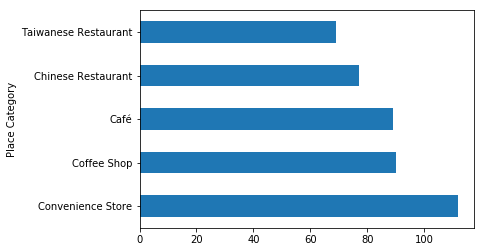

In [173]:
#Taipei_venues.columns = Taipei_venues.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
#radius 500 391 venues  #radius1000 1030 venues   #radius1500 1356 venues  #radius2000 1526 venues
test=Taipei_venues.groupby('Place Category')['Districts'].count().sort_values(ascending=False)[:5].plot.barh()


In [174]:
#radius1000 132venues
#radius 15000 170 venues
Taipei_coffee=Taipei_venues.loc[Taipei_venues['Place Category'].isin(['Coffee Shop','Café'])]
Taipei_coffee.index=range(len(Taipei_coffee))
Taipei_coffee.head()

,Districts,Place,Place Latitude,Place Longitude,Place Category
0,Zhongzheng District,虎記商行,25.031744,121.519284,Café
1,Zhongzheng District,Peloso Coffee Roasters (沛洛瑟珈琲店),25.033551,121.507602,Coffee Shop
2,Zhongzheng District,生活在他方 Elsewhere Cafe,25.030536,121.520630,Café
3,Zhongzheng District,The Cafeist & Jackwell,25.026490,121.522738,Coffee Shop
4,Zhongzheng District,Café Macho (早秋咖啡),25.026304,121.521387,Café


In [175]:
coffee_district=Taipei_coffee.groupby('Districts')['Place'].count().sort_values(ascending=False).reset_index()
coffee_district

,Districts,Place
0,Daan District,18
1,Zhongzheng District,15
2,Neihu District,15
3,Yonghe District,13
4,Zhonghe District,12
5,Xindian District,11
6,Nangang District,11
7,Wanhua District,11
8,Songshan District,10
9,Banqiao District,10


Text(0.9, 0.7, '2019')

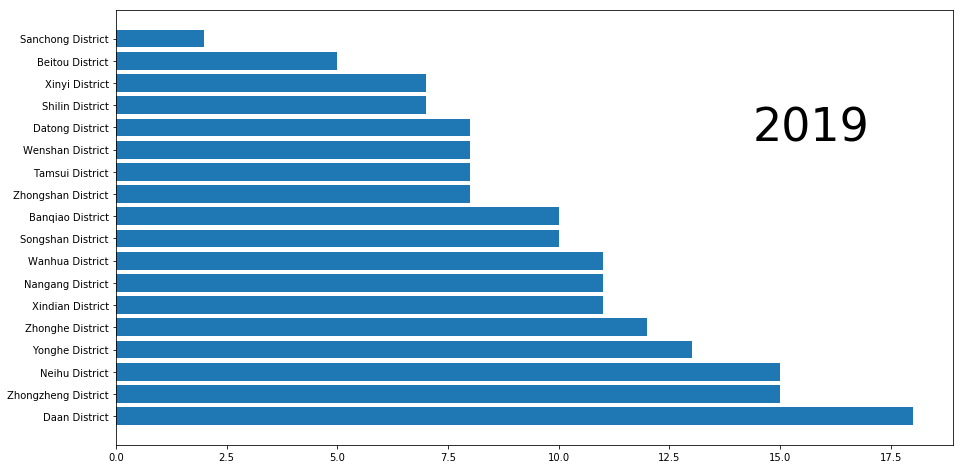

In [176]:
#Taipei_coffee.groupby('Districts')['Place'].count().sort_values(ascending=True).plot.barh()

fig, ax = plt.subplots(figsize=(15, 8))

# pass colors values to `color=`
ax.barh(coffee_district['Districts'], coffee_district['Place'])

    
# Add year right middle portion of canvas
ax.text(0.9, 0.7, 2019, transform=ax.transAxes, size=46, ha='right')

/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/opt/conda/envs/Python36/lib/python3.6/site-packages/matplotlib/cbo

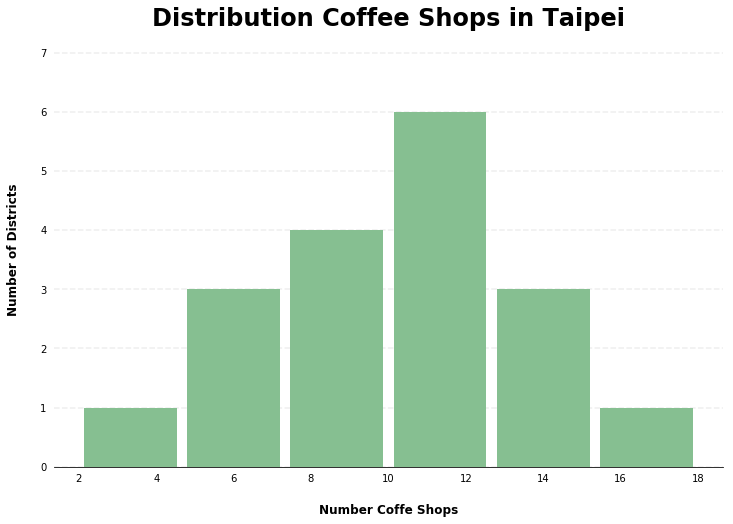

In [177]:
# check out distrubtion
ax = coffee_district.hist(column='Place', bins=6, grid=False, figsize=(12,8), color='#86bf91', zorder=4, rwidth=0.9)

ax = ax[0]
for x in ax:
    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=1, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("Distribution Coffee Shops in Taipei", weight='bold', size=24)

    # Set x-axis label
    x.set_xlabel("Number Coffe Shops", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Number of Districts", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [178]:
address = 'Taipei,Taiwan'
geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Taipei,Taiwan are {}, {}.'.format(latitude, longitude))

# create map of Taipei using latitude and longitude values
venues_map= folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, Districts in zip(Taipei_coffee['Place Latitude'], Taipei_coffee['Place Longitude'], Taipei_coffee['Place']):
    label = '{}'.format(Districts)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(venues_map)  
venues_map

for lat, lng, Districts in zip(df_final['Latitude'], df_final['Longitude'], df_final['Districts']):
    label = '{}'.format(Districts)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='lightgreen',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(venues_map)  
venues_map

The geograpical coordinate of Taipei,Taiwan are 25.0375198, 121.5636796.


In [179]:
from folium import plugins
m=folium.Map(location=[latitude, longitude], zoom_start=12)
stationArr = Taipei_coffee[['Place Latitude', 'Place Longitude']].as_matrix()

# plot heatmap
m.add_children(plugins.HeatMap(stationArr, radius=20))
m


/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  app.launch_new_instance()
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: Method `add_children` is deprecated. Please use `add_child` instead.


In [218]:
search_query ='Coffee Shop'
radius = 500
LIMIT=300
name=df_final.iloc[4,1]
latitude=df_final.iloc[4,3]
longitude=df_final.iloc[4,4]
print(name)
print(latitude)
print(longitude)
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

Daan District
25.0297299
121.5361368


'https://api.foursquare.com/v2/venues/search?client_id=R4WINZIX50TNKXEEQJTMDISXQ3UUF5ONEVUHBLILTMMDBIX3&client_secret=OL4CKT5NSVBFHKWFHKGXYS11PE35HS34HO0JDRBQDRFIT5SM&ll=25.0297299,121.5361368&v=20180605&query=Coffee Shop&radius=500&limit=300'

In [219]:
results = requests.get(url).json()
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,路易·莎咖啡 Louisa Coffee 大安森林公園店,Café,信義路三段100號B1,TW,台北市大安區,臺灣,395,"[信義路三段100號B1, 台北市大安區, 106, 臺灣]","[{'label': 'display', 'lat': 25.03318966963655...",25.033190,121.535263,NaN,106,NaN,58cc9bc22f91cb28ec964921
1,Louisa Coffee,Coffee Shop,瑞安街208巷24弄6號1樓,TW,Da-an District,臺灣,352,"[瑞安街208巷24弄6號1樓, Da-an District, 106, 臺灣]","[{'label': 'display', 'lat': 25.02865, 'lng': ...",25.028650,121.539418,NaN,106,NaN,58f83f7c1c675b630d3f1a63
2,路易莎咖啡 Louisa Coffee瑞安門市,Café,建國南路二段151巷40號,TW,大安區,臺灣,355,"[建國南路二段151巷40號, 大安區, 臺北市 106, 臺灣]","[{'label': 'display', 'lat': 25.028624, 'lng':...",25.028624,121.539444,Dà'ān Qū,106,臺北市,5b1b60873d4791002cc213a7
3,Naps Coffee,Café,NaN,TW,大按,臺灣,311,"[大按, 臺灣省 106, 臺灣]","[{'label': 'display', 'lat': 25.027737, 'lng':...",25.027737,121.538310,NaN,106,臺灣省,58636735abc6d60cc37ee6a3
4,月半咖啡Dwaco Coffee Co.,Café,大安區永康街47巷30號,TW,台北市,臺灣,506,"[大安區永康街47巷30號, 台北市, 106, 臺灣]","[{'label': 'display', 'lat': 25.030266, 'lng':...",25.030266,121.531153,NaN,106,NaN,597c205cdd84420c83224c14
5,路易．莎咖啡 Louisa Coffee 建國店,Coffee Shop,瑞安街151號,TW,大安區,臺灣,489,"[瑞安街151號, 大安區, 臺北市 106, 臺灣]","[{'label': 'display', 'lat': 25.026598, 'lng':...",25.026598,121.539543,NaN,106,臺北市,5b021f0fc9a517002c646fff
6,星巴克 Starbucks,Coffee Shop,和平東路二段42-1號,TW,台北市,臺灣,473,"[和平東路二段42-1號, 台北市, 106, 臺灣]","[{'label': 'display', 'lat': 25.02567810361903...",25.025678,121.537566,NaN,106,NaN,4db3fac1a86e8d27077ba702
7,Magic Lamp Coffee,Coffee Shop,建國南路一段313號,TW,大安區,臺灣,610,"[建國南路一段313號, 大安區, 臺北市, 臺灣]","[{'label': 'display', 'lat': 25.03498858534811...",25.034989,121.537839,NaN,NaN,臺北市,4b5667caf964a5200b0f28e3
8,路易．莎咖啡 Louisa Coffee,Coffee Shop,NaN,TW,大安區,臺灣,553,"[大安區, 臺北市 106, 臺灣]","[{'label': 'display', 'lat': 25.026052, 'lng':...",25.026052,121.532449,NaN,106,臺北市,59a500c1e97dfb10459affdb
9,Barsac Coffee,Coffee Shop,NaN,TW,NaN,臺灣,487,[臺灣],"[{'label': 'display', 'lat': 25.026622, 'lng':...",25.026622,121.539540,NaN,NaN,NaN,58a14b5514f8f42475d211d0


In [220]:
Taipei_coffee_daan=dataframe_filtered.loc[dataframe_filtered['categories'].isin(['Coffee Shop','Café'])]
#Taipei_coffee_daan.index=range(len(dataframe_filtered))
Taipei_coffee_daan.head()

,name,categories,address,cc,city,country,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,路易·莎咖啡 Louisa Coffee 大安森林公園店,Café,信義路三段100號B1,TW,台北市大安區,臺灣,395,"[信義路三段100號B1, 台北市大安區, 106, 臺灣]","[{'label': 'display', 'lat': 25.03318966963655...",25.033190,121.535263,NaN,106,NaN,58cc9bc22f91cb28ec964921
1,Louisa Coffee,Coffee Shop,瑞安街208巷24弄6號1樓,TW,Da-an District,臺灣,352,"[瑞安街208巷24弄6號1樓, Da-an District, 106, 臺灣]","[{'label': 'display', 'lat': 25.02865, 'lng': ...",25.028650,121.539418,NaN,106,NaN,58f83f7c1c675b630d3f1a63
2,路易莎咖啡 Louisa Coffee瑞安門市,Café,建國南路二段151巷40號,TW,大安區,臺灣,355,"[建國南路二段151巷40號, 大安區, 臺北市 106, 臺灣]","[{'label': 'display', 'lat': 25.028624, 'lng':...",25.028624,121.539444,Dà'ān Qū,106,臺北市,5b1b60873d4791002cc213a7
3,Naps Coffee,Café,NaN,TW,大按,臺灣,311,"[大按, 臺灣省 106, 臺灣]","[{'label': 'display', 'lat': 25.027737, 'lng':...",25.027737,121.538310,NaN,106,臺灣省,58636735abc6d60cc37ee6a3
4,月半咖啡Dwaco Coffee Co.,Café,大安區永康街47巷30號,TW,台北市,臺灣,506,"[大安區永康街47巷30號, 台北市, 106, 臺灣]","[{'label': 'display', 'lat': 25.030266, 'lng':...",25.030266,121.531153,NaN,106,NaN,597c205cdd84420c83224c14


In [221]:
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Taipei,Taiwan are {}, {}.'.format(latitude, longitude))

# create map of Taipei using latitude and longitude values
venues_map= folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, Districts in zip(Taipei_coffee['Place Latitude'], Taipei_coffee['Place Longitude'], Taipei_coffee['Place']):
    label = '{}'.format(Districts)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(venues_map)  
venues_map

for lat, lng, Districts in zip(df_final['Latitude'], df_final['Longitude'], df_final['Districts']):
    label = '{}'.format(Districts)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='lightgreen',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(venues_map)  
venues_map

for lat, lng, Districts in zip(Taipei_coffee_daan['lat'], Taipei_coffee_daan['lng'], Taipei_coffee_daan['name']):
    label = '{}'.format(Districts)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=7,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(venues_map)  
venues_map

The geograpical coordinate of Taipei,Taiwan are 25.0375198, 121.5636796.


In [226]:
venue_id='597c205cdd84420c83224c14'

url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)

result = requests.get(url).json()
try:
    print(result['response']['venue']['rating'])
except:
    print('This venue has not been rated yet.')

This venue has not been rated yet.


In [68]:
# one hot encoding
Taipei_onehot = pd.get_dummies(Taipei_venues[['Place Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Taipei_onehot['Districts'] = Taipei_venues['Districts'] 

# move neighborhood column to the first column
fixed_columns = [Taipei_onehot.columns[-1]] + list(Taipei_onehot.columns[:-1])
Taipei_onehot = Taipei_onehot[fixed_columns]

Taipei_onehot.head()
Taipei_onehot.shape

(1526, 186)

In [69]:
Taipei_grouped = Taipei_onehot.groupby('Districts').mean().reset_index()
Taipei_grouped



,Districts,ATM,American Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Beer Bar,Beer Garden,Beijing Restaurant,Belgian Restaurant,Bike Rental / Bike Share,Bistro,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Brewery,Bridge,Bubble Tea Shop,Buddhist Temple,Buffet,Building,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Campground,Cantonese Restaurant,Chinese Breakfast Place,Chinese Restaurant,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Academic Building,Comfort Food Restaurant,Community College,Concert Hall,Convenience Store,Convention Center,Cultural Center,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dog Run,Donburi Restaurant,Donut Shop,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Garden,Gay Bar,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Historic Site,History Museum,Hong Kong Restaurant,Hostel,Hot Spring,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jiangsu Restaurant,Juice Bar,Karaoke Bar,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lounge,Malay Restaurant,Market,Massage Studio,Metro Station,Miscellaneous Shop,Modern European Restaurant,Mongolian Restaurant,Monument / Landmark,Motorcycle Shop,Mountain,Movie Theater,Multiplex,Museum,Music Venue,Night Market,Nightclub,Noodle House,Office,Other Great Outdoors,Other Nightlife,Park,Performing Arts Venue,Pet Store,Pharmacy,Pier,Pizza Place,Planetarium,Playground,Plaza,Pool,Pub,Public Art,Ramen Restaurant,Record Shop,Resort,Restaurant,River,Rock Club,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Shoe Store,Shopping Mall,Snack Place,Soccer Field,Soup Place,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Stadium,Stationery Store,Steakhouse,Street Food Gathering,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taiwanese Restaurant,Tea Room,Temple,Tennis Stadium,Thai Restaurant,Theater,Theme Park,Tonkatsu Restaurant,Tourist Information Center,Toy / Game Store,Trail,Train,Train Station,Used Bookstore,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Warehouse Store,Yoga Studio
0,Banqiao District,0.012821,0.012821,0.000000,0.000000,0.00,0.025641,0.000000,0.000000,0.000000,0.012821,0.012821,0.000000,0.000000,0.000000,0.000000,0.012821,0.000000,0.000000,0.000000,0.012821,0.00,0.000000,0.025641,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.038462,0.000000,0.00,0.00,0.038462,0.000000,0.012821,0.00,0.089744,0.000000,0.000000,0.00,0.00,0.089744,0.000000,0.000000,0.00,0.012821,0.000000,0.000000,0.012821,0.00,0.000000,0.00,0.000000,0.012821,0.00,0.000000,0.000000,0.00,0.000000,0.025641,0.00,0.00000,0.012821,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.012821,0.000000,0.000000,0.00,0.000000,0.012821,0.012821,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.012821,0.00,0.012821,0.000000,0.012821,0.000000,0.012821,0.012821,0.000000,0.025641,0.000000,0.000000,0.012821,0.000000,0.00,0.00,0.000000,0.00,0.012821,0.012821,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.00,0.012821,0.025641,0.000000,0.00000,0.012821,0.000000,0.012821,0.000000,0.00,0.00000,0.000000,0.025641,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.012821,0.000000,0.00,0.00,0.025641,0.00,0.000000,0.025641,0.000000,0.00,0.00,0.000000,0.000000,0.025641,0.00,0.00,0.000000,0.051282,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.025641,0.00,0.000000,0.000000,0.012821,0.000000,0.000000,0.025641,0.000000,0.012821,0.0000

In [70]:
num_top_venues = 5

for dist in Taipei_grouped['Districts']:
    print("----"+ Districts +"----")
    temp =Taipei_grouped[Taipei_grouped['Districts'] == dist].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')  

----Tamsui District----
                venue  freq
0         Coffee Shop  0.09
1   Convenience Store  0.09
2       Shopping Mall  0.05
3  Chinese Restaurant  0.04
4                Café  0.04


----Tamsui District----
               venue  freq
0              Hotel  0.16
1         Hot Spring  0.11
2             Resort  0.07
3  Convenience Store  0.07
4       Noodle House  0.07


----Tamsui District----
                venue  freq
0                Café  0.14
1               Hotel  0.07
2  Chinese Restaurant  0.06
3              Bakery  0.05
4        Noodle House  0.04


----Tamsui District----
                  venue  freq
0    Chinese Restaurant  0.13
1                 Hotel  0.10
2  Taiwanese Restaurant  0.06
3           Coffee Shop  0.05
4   Japanese Restaurant  0.04


----Tamsui District----
                  venue  freq
0     Convenience Store  0.16
1           Coffee Shop  0.10
2  Fast Food Restaurant  0.06
3          Noodle House  0.04
4                  Café  0.04


----Tamsui D

In [71]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [72]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Districts']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted = pd.DataFrame(columns=columns)
district_venues_sorted['Districts'] = Taipei_grouped['Districts']

for ind in np.arange(Taipei_grouped.shape[0]):
    district_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Taipei_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted

,Districts,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Banqiao District,Coffee Shop,Convenience Store,Shopping Mall,Café,Chinese Restaurant,Train Station,Fast Food Restaurant,Ramen Restaurant,Breakfast Spot,Performing Arts Venue
1,Beitou District,Hotel,Hot Spring,Convenience Store,Noodle House,Resort,Park,Coffee Shop,Café,Japanese Restaurant,French Restaurant
2,Daan District,Café,Hotel,Chinese Restaurant,Bakery,Noodle House,Coffee Shop,Taiwanese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Hotpot Restaurant
3,Datong District,Chinese Restaurant,Hotel,Taiwanese Restaurant,Coffee Shop,Dumpling Restaurant,Noodle House,Japanese Restaurant,Café,Massage Studio,Arts & Crafts Store
4,Nangang District,Convenience Store,Coffee Shop,Fast Food Restaurant,Café,Noodle House,Hotel,Train Station,Chinese Restaurant,Japanese Restaurant,Bubble Tea Shop
5,Neihu District,Convenience Store,Coffee Shop,Café,Chinese Restaurant,Supermarket,Bakery,Noodle House,Fast Food Restaurant,Sporting Goods Shop,Night Market
6,Sanchong District,Park,Convenience Store,Coffee Shop,Chinese Restaurant,Taiwanese Restaurant,Night Market,Bus Station,Market,Bowling Alley,Steakhouse
7,Shilin District,Taiwanese Restaurant,Chinese Restaurant,Café,Ice Cream Shop,Food Court,Burger Joint,Convenience Store,Hotpot Restaurant,Breakfast Spot,Hotel
8,Songshan District,Department Store,Café,Chinese Restaurant,Hotel,Japanese Restaurant,Dessert Shop,Taiwanese Restaurant,Coffee Shop,Park,Hotpot Restaurant
9,Tamsui District,Convenience Store,Taiwanese Restaurant,Café,Snack Place,Coffee Shop,American Restaurant,Dessert Shop,Ice Cream Shop,Fast Food Restaurant,Chinese Restaurant


In [63]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

TEST FUNCTION

CLUSTERING on the first 10 avenues

In [73]:
# set number of clusters
kclusters = 5

Taipei_clustering = Taipei_grouped.drop('Districts', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Taipei_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 0, 3, 2, 4, 4, 1, 3, 3, 1], dtype=int32)

In [74]:
# add clustering labels
district_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Taipei_merged = df_final

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Taipei_merged = Taipei_merged.join(district_venues_sorted.set_index('Districts'), on='Districts')

Taipei_merged.head() # check the last columns!

,Code,Districts,Chinese,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,100,Zhongzheng District,中正區,25.031667,121.516389,3,Café,Noodle House,Ice Cream Shop,Bakery,Taiwanese Restaurant,Coffee Shop,Food Truck,Japanese Restaurant,Park,Tea Room
1,103,Datong District,大同區,25.047760,121.531850,2,Chinese Restaurant,Hotel,Taiwanese Restaurant,Coffee Shop,Dumpling Restaurant,Noodle House,Japanese Restaurant,Café,Massage Studio,Arts & Crafts Store
2,104,Zhongshan District,中山區,25.068889,121.533056,2,Hotel,Taiwanese Restaurant,Chinese Restaurant,Café,Dessert Shop,Japanese Restaurant,Seafood Restaurant,Hotpot Restaurant,Sushi Restaurant,Asian Restaurant
3,105,Songshan District,松山區,25.049300,121.578000,3,Department Store,Café,Chinese Restaurant,Hotel,Japanese Restaurant,Dessert Shop,Taiwanese Restaurant,Coffee Shop,Park,Hotpot Restaurant
4,106,Daan District,大安區,25.029730,121.536137,3,Café,Hotel,Chinese Restaurant,Bakery,Noodle House,Coffee Shop,Taiwanese Restaurant,Vegetarian / Vegan Restaurant,Sushi Restaurant,Hotpot Restaurant


In [75]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Taipei_merged['Latitude'], Taipei_merged['Longitude'],Taipei_merged['Districts'], Taipei_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

CLUSTER 1


In [48]:
Taipei_merged.loc[Taipei_merged['Cluster Labels'] == 0, Taipei_merged.columns[[1] + list(range(5, Taipei_merged.shape[1]))]]

,Districts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Zhongzheng District,0,Café,Noodle House,Theater,Bakery,History Museum,Snack Place,Indian Restaurant,Fried Chicken Joint,Japanese Restaurant,Latin American Restaurant
1,Datong District,0,Japanese Restaurant,Café,Electronics Store,Seafood Restaurant,Italian Restaurant,Noodle House,Coffee Shop,Taiwanese Restaurant,Hotpot Restaurant,Chinese Restaurant
2,Zhongshan District,0,Seafood Restaurant,Park,Fish Market,Chinese Restaurant,Historic Site,Hotel,BBQ Joint,Tea Room,Taiwanese Restaurant,Sushi Restaurant
3,Songshan District,0,Taiwanese Restaurant,Seafood Restaurant,Gym / Fitness Center,Bookstore,Coffee Shop,Clothing Store,Chinese Restaurant,Convenience Store,Dumpling Restaurant,Bridge
4,Daan District,0,Café,Convenience Store,Park,Sandwich Place,Coffee Shop,Playground,Bike Rental / Bike Share,Pizza Place,Mexican Restaurant,Market
6,Xinyi District,0,Department Store,Steakhouse,Hotel,Gym / Fitness Center,Coffee Shop,Electronics Store,Lounge,BBQ Joint,Tea Room,Japanese Restaurant
8,Beitou District,0,Coffee Shop,Café,Noodle House,Dessert Shop,Tea Room,Boarding House,Hotel,Farmers Market,Lounge,Hot Spring
10,Nangang District,0,Japanese Restaurant,Train Station,Convenience Store,Korean Restaurant,Shopping Mall,Noodle House,Movie Theater,Gym / Fitness Center,Café,Donut Shop
12,Banqiao District,0,Coffee Shop,Fast Food Restaurant,Chinese Restaurant,Train Station,Hotpot Restaurant,Restaurant,Convenience Store,Ramen Restaurant,Café,Bus Stop
17,Tamsui District,0,Chinese Restaurant,Café,Snack Place,Taiwanese Restaurant,Sushi Restaurant,Seafood Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Fast Food Restaurant,Market


CLUSTER 2

In [49]:
Taipei_merged.loc[Taipei_merged['Cluster Labels'] == 1, Taipei_merged.columns[[1] + list(range(5, Taipei_merged.shape[1]))]]

,Districts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Wanhua District,1,Convenience Store,Record Shop,Vegetarian / Vegan Restaurant,Clothing Store,Comic Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop
16,Sanchong District,1,Convenience Store,Chinese Restaurant,Restaurant,Clothing Store,Comic Shop,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Donut Shop


CLUSTER 3

In [50]:
Taipei_merged.loc[Taipei_merged['Cluster Labels'] == 2, Taipei_merged.columns[[1] + list(range(5, Taipei_merged.shape[1]))]]

,Districts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Neihu District,2,Convenience Store,Chinese Restaurant,Bus Stop,Japanese Restaurant,Korean Restaurant,Gym,Hotpot Restaurant,Gym / Fitness Center,Historic Site,Hotel
11,Wenshan District,2,Japanese Restaurant,Convenience Store,Chinese Restaurant,Park,Soup Place,Hotpot Restaurant,Sushi Restaurant,Café,Dessert Shop,Bus Station
14,Yonghe District,2,Convenience Store,Café,Taiwanese Restaurant,Museum,Breakfast Spot,Coffee Shop,Vegetarian / Vegan Restaurant,Electronics Store,Department Store,Dessert Shop


CLUSTER 4

In [51]:
Taipei_merged.loc[Taipei_merged['Cluster Labels'] == 3, Taipei_merged.columns[[1] + list(range(5, Taipei_merged.shape[1]))]]

,Districts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Xindian District,3,Noodle House,Fast Food Restaurant,Japanese Restaurant,Chinese Restaurant,Café,Bus Station,Convenience Store,Italian Restaurant,Gym / Fitness Center,Donut Shop
15,Zhonghe District,3,Fast Food Restaurant,Convenience Store,Café,Restaurant,Japanese Restaurant,Noodle House,Farmers Market,Department Store,Dessert Shop,Dim Sum Restaurant


CLUSTER 5

In [52]:
Taipei_merged.loc[Taipei_merged['Cluster Labels'] == 4, Taipei_merged.columns[[1] + list(range(5, Taipei_merged.shape[1]))]]

,Districts,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Shilin District,4,Hotel,Spiritual Center,Bus Station,Burger Joint,Juice Bar,Convenience Store,Department Store,Dessert Shop,Dim Sum Restaurant,Diner


CLUSTERING on the first 3 VENUES

In [78]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Districts']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
district_venues_sorted2 = pd.DataFrame(columns=columns)
district_venues_sorted2['Districts'] = Taipei_grouped['Districts']

for ind in np.arange(Taipei_grouped.shape[0]):
    district_venues_sorted2.iloc[ind, 1:] = return_most_common_venues(Taipei_grouped.iloc[ind, :], num_top_venues)

district_venues_sorted2

,Districts,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Banqiao District,Coffee Shop,Convenience Store,Shopping Mall
1,Beitou District,Hotel,Hot Spring,Convenience Store
2,Daan District,Café,Hotel,Chinese Restaurant
3,Datong District,Chinese Restaurant,Hotel,Taiwanese Restaurant
4,Nangang District,Convenience Store,Coffee Shop,Fast Food Restaurant
5,Neihu District,Convenience Store,Coffee Shop,Café
6,Sanchong District,Park,Convenience Store,Coffee Shop
7,Shilin District,Taiwanese Restaurant,Chinese Restaurant,Café
8,Songshan District,Department Store,Café,Chinese Restaurant
9,Tamsui District,Convenience Store,Taiwanese Restaurant,Café


In [76]:
# set number of clusters
kclusters = 7

Taipei_clustering = Taipei_grouped.drop('Districts', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Taipei_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 4, 0, 3, 1, 6, 5, 2, 3, 2], dtype=int32)

In [79]:
# add clustering labels
district_venues_sorted2.insert(0, 'Cluster Label', kmeans.labels_)

Taipei_merged2 = df_final

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Taipei_merged2 = Taipei_merged2.join(district_venues_sorted2.set_index('Districts'), on='Districts')

Taipei_merged2.head() # check the last columns!

,Code,Districts,Chinese,Latitude,Longitude,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,100,Zhongzheng District,中正區,25.031667,121.516389,0,Café,Noodle House,Ice Cream Shop
1,103,Datong District,大同區,25.047760,121.531850,3,Chinese Restaurant,Hotel,Taiwanese Restaurant
2,104,Zhongshan District,中山區,25.068889,121.533056,3,Hotel,Taiwanese Restaurant,Chinese Restaurant
3,105,Songshan District,松山區,25.049300,121.578000,3,Department Store,Café,Chinese Restaurant
4,106,Daan District,大安區,25.029730,121.536137,0,Café,Hotel,Chinese Restaurant


In [80]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Taipei_merged2['Latitude'], Taipei_merged2['Longitude'],Taipei_merged2['Districts'], Taipei_merged2['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters


In [83]:
Taipei_merged2.loc[Taipei_merged2['Cluster Label'] == 0, Taipei_merged2.columns[[1] + list(range(5, Taipei_merged2.shape[1]))]]

,Districts,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
13,Xindian District,0,Noodle House,Fast Food Restaurant,Japanese Restaurant
15,Zhonghe District,0,Fast Food Restaurant,Convenience Store,Café


In [84]:
Taipei_merged2.loc[Taipei_merged2['Cluster Label'] == 1, Taipei_merged2.columns[[1] + list(range(5, Taipei_merged2.shape[1]))]]

,Districts,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Zhongzheng District,1,Café,Noodle House,Theater
1,Datong District,1,Japanese Restaurant,Café,Electronics Store
4,Daan District,1,Café,Convenience Store,Park
6,Xinyi District,1,Department Store,Steakhouse,Hotel
8,Beitou District,1,Coffee Shop,Café,Noodle House
10,Nangang District,1,Japanese Restaurant,Train Station,Convenience Store
12,Banqiao District,1,Coffee Shop,Fast Food Restaurant,Chinese Restaurant


In [89]:
Taipei_merged2.loc[Taipei_merged2['Cluster Label'] == 2, Taipei_merged2.columns[[1] + list(range(5, Taipei_merged2.shape[1]))]]

,Districts,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
9,Neihu District,2,Convenience Store,Chinese Restaurant,Bus Stop
11,Wenshan District,2,Japanese Restaurant,Convenience Store,Chinese Restaurant


In [88]:
Taipei_merged2.loc[Taipei_merged2['Cluster Label'] ==3, Taipei_merged2.columns[[1] + list(range(5, Taipei_merged2.shape[1]))]]

,Districts,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
5,Wanhua District,3,Convenience Store,Record Shop,Vegetarian / Vegan Restaurant
16,Sanchong District,3,Convenience Store,Chinese Restaurant,Restaurant


In [87]:
Taipei_merged2.loc[Taipei_merged2['Cluster Label'] == 4, Taipei_merged2.columns[[1] + list(range(5, Taipei_merged2.shape[1]))]]

,Districts,Cluster Label,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
7,Shilin District,4,Hotel,Spiritual Center,Bus Station


Using Foursquare list I select coffee shops  https://foursquare.com/top-places/taipei/best-places-coffee  September 11, 2019

In [81]:
#create a dataframe

# intialise data of lists. 
data_firstcoffee = {'Coffee_Shop_Name':['Wilbeck Cafe', 'All Day Roasting Company', 'Woolloomooloo WXY', 'Gabee','Yaboo Cafe'],'District':['Zhongzheng', 'Songshan', 'Xinyi','Songshan','Daan'], 'FourSquare_id':['4c9db164542b224bd7b8ec9f', '545c3b25498e2a6ea3d2bde5','4ecf77fb0e01f1a87ea81145', '4b8a1f2cf964a520d66032e3','4bd44330b221c9b6b737dbd0']} 
  
# Create DataFrame 
df_coffee = pd.DataFrame(data_firstcoffee) 
df_coffee 

,Coffee_Shop_Name,District,FourSquare_id
0,Wilbeck Cafe,Zhongzheng,4c9db164542b224bd7b8ec9f
1,All Day Roasting Company,Songshan,545c3b25498e2a6ea3d2bde5
2,Woolloomooloo WXY,Xinyi,4ecf77fb0e01f1a87ea81145
3,Gabee,Songshan,4b8a1f2cf964a520d66032e3
4,Yaboo Cafe,Daan,4bd44330b221c9b6b737dbd0


In [227]:
for name, venue_id in zip(df_coffee['Coffee_Shop_Name'], df_coffee['FourSquare_id']):
        print(name,venue_id)
          
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/{}?client_id={}&client_secret={}&v={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION)
        result = requests.get(url).json()      
        try:
            print(result['response']['venue']['rating'])
            print(result['response']['venue']['tips']['count'])
        except:
            print('This venue has not been rated yet.')
      

Wilbeck Cafe 4c9db164542b224bd7b8ec9f
This venue has not been rated yet.
All Day Roasting Company 545c3b25498e2a6ea3d2bde5
This venue has not been rated yet.
Woolloomooloo WXY 4ecf77fb0e01f1a87ea81145
This venue has not been rated yet.
Gabee 4b8a1f2cf964a520d66032e3
This venue has not been rated yet.
Yaboo Cafe 4bd44330b221c9b6b737dbd0
This venue has not been rated yet.


In [45]:
## Tips
venue_id='545c3b25498e2a6ea3d2bde5'
limit = 100 # set limit to be greater than or equal to the total number of tips
url = 'https://api.foursquare.com/v2/venues/{}/tips?client_id={}&client_secret={}&v={}&limit={}'.format(venue_id, CLIENT_ID, CLIENT_SECRET, VERSION, limit)

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ddb6d80b1cac0001bbbf209'},
 'response': {'tips': {'count': 26,
   'items': [{'id': '576d95d5498e84f9925aa2f6',
     'createdAt': 1466799573,
     'text': 'Coffee was great. Panini average. Friend loved his brownie. Front room (with couches etc) was like a sauna in the midday sun - visit early or in the afternoon :)',
     'type': 'user',
     'canonicalUrl': 'https://foursquare.com/item/576d95d5498e84f9925aa2f6',
     'lang': 'en',
     'likes': {'count': 0, 'groups': []},
     'logView': True,
     'agreeCount': 3,
     'disagreeCount': 0,
     'todo': {'count': 0},
     'user': {'id': '12976525',
      'firstName': 'Jay',
      'gender': 'male',
      'photo': {'prefix': 'https://fastly.4sqi.net/img/user/',
       'suffix': '/12976525-5H5DV4FFJ4MSV45G.jpg'}},
     'authorInteractionType': 'liked'}]}}}

In [47]:
tips = results['response']['tips']['items']

tip = results['response']['tips']['items'][0]
tip.keys()

dict_keys(['id', 'createdAt', 'text', 'type', 'canonicalUrl', 'lang', 'likes', 'logView', 'agreeCount', 'disagreeCount', 'todo', 'user', 'authorInteractionType'])

In [49]:
pd.set_option('display.max_colwidth', -1)

tips_df = json_normalize(tips) # json normalize tips

# columns to keep
filtered_columns = ['text', 'agreeCount', 'disagreeCount', 'id', 'user.firstName', 'user.lastName', 'user.gender', 'user.id']
tips_filtered = tips_df.loc[:, filtered_columns]

# display tips
tips_filtered

,text,agreeCount,disagreeCount,id,user.firstName,user.lastName,user.gender,user.id
0,Coffee was great. Panini average. Friend loved his brownie. Front room (with couches etc) was like a sauna in the midday sun - visit early or in the afternoon :),3,0,576d95d5498e84f9925aa2f6,Jay,NaN,male,12976525


Now remember that because we are using a personal developer account, then we can access only 2 of the restaurant's tips, instead of all 15 tips.